In [1]:
# # 초기 1회 실행
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# 📥 데이터 다운로드 (Download Dataset)
# GitHub에서 csv 파일을 다운로드합니다.

!wget https://raw.githubusercontent.com/Dropthe-bit/ai_portfolio/main/data/uber_lyft_sampled_train.csv
!wget https://raw.githubusercontent.com/Dropthe-bit/ai_portfolio/main/data/uber_lyft_sampled_test.csv

--2025-06-25 03:21:24--  https://raw.githubusercontent.com/Dropthe-bit/ai_portfolio/main/data/uber_lyft_sampled_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 791554 (773K) [text/plain]
Saving to: ‘uber_lyft_sampled_train.csv’

uber_lyft_sampled_t 100%[===================>] 773.00K  --.-KB/s    in 0.06s   

2025-06-25 03:21:24 (13.6 MB/s) - ‘uber_lyft_sampled_train.csv’ saved [791554/791554]

--2025-06-25 03:21:24--  https://raw.githubusercontent.com/Dropthe-bit/ai_portfolio/main/data/uber_lyft_sampled_test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request se

# Machine_Learning1_regressor

In [3]:
## 필요 패키지 설치 및 import
import importlib.util
import subprocess
import sys
def install_and_import(packages):
    for pkg in packages:
        package = pkg
        try:
            importlib.util.find_spec(package)
            print(f"{package} is already installed.")
        except ImportError:
            # 모듈이 설치되어 있지 않은 경우 설치시도
            print(f"{package} is not installed. Installing...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])
            subprocess.check_call(["conda", "install", package, "-y"])

            # 설치 후 다시 임포트를 시도
            importlib.import_module(package)
            print(f"{package} has been successfully installed.")

        # finally:
        #     globals()[package] = importlib.import_module(package)
        except Exception as e:
            # 설치 중 예외가 발생한 경우, 에러 메시지를 출력
            print(f"An error occurred while installing {package}: {str(e)}")

# 예시 사용법
# install_and_import(['CHAID'])


In [4]:
## 필요 모듈 임포트
import os, sys, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification


In [6]:
## 데이터 로드
train_data = pd.read_csv('uber_lyft_sampled_train.csv')
test_data = pd.read_csv('uber_lyft_sampled_test.csv')

## 입력 데이터와 타겟 변수 분리
X_train = train_data.drop(columns=['price'])
y_train = train_data['price']

X_test = test_data.drop(columns=['price'])
y_test = test_data['price']


- 주요 파라미터 ..
  - product_id: 서비스 또는 차량 모델 식별자
  - distance: 주행 거리
  - surge_multiplier: 수요 급증 요금 배수
  - precipIntensity: 강수 강도
  - precipProbability: 강수 확률
  - temperatureLow: 최저 기온
  - temperatureLowTime: 최저 기온 기록 시각
  - apparentTemperatureLowTime: 체감 기온 최저 시각
  - icon: 날씨 아이콘
  - pressure: 기압
  - cloudCover: 구름 덮개 비율
  - ozone: 오존 농도
  - moonPhase: 달의 위상
  - temperatureMinTime: 최저 기온 기록 시각
  - apparentTemperatureMinTime: 체감 기온 최저 시각
  - source: 출발 위치
  - cab_type: 차량 종류
  - name: 차량 식별자 또는 서비스 이름
  - short_summary: 날씨나 교통 상황 간단 요약
  - destination: 목적지

In [7]:
X_train

,source,destination,cab_type,product_id,name,distance,surge_multiplier,short_summary,precipIntensity,precipProbability,temperatureLow,temperatureLowTime,apparentTemperatureLowTime,icon,pressure,cloudCover,ozone,moonPhase,temperatureMinTime,apparentTemperatureMinTime
0,6,0,0,7,5,2.90,1.0,1,0.0,0.0,37.17,1543464000,1543460400,4,997.37,0.75,348.9,0.72,1543399200,1543399200
1,0,9,1,1,0,1.68,1.0,3,0.0,0.0,33.82,1543399200,1543399200,4,991.84,0.13,308.4,0.68,1543377600,1543377600
2,9,7,1,1,0,2.29,1.0,1,0.0,0.0,37.60,1543489200,1543478400,4,996.92,0.77,349.9,0.72,1543399200,1543399200
3,1,8,1,6,12,1.92,1.0,3,0.0,0.0,33.65,1543399200,1543399200,4,991.29,0.28,307.6,0.68,1543377600,1543377600
4,0,5,1,2,1,3.79,1.0,3,0.0,0.0,28.70,1543579200,1543575600,4,1003.62,0.22,341.1,0.75,1543550400,1543550400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7226,10,6,1,3,11,1.57,1.0,3,0.0,0.0,28.70,1543579200,1543575600,4,1003.62,0.22,341.1,0.75,1543550400,1543550400
7227,1,8,1,1,0,1.93,1.0,0,0.0,0.0,31.57,1543658400,1543658400,1,1013.87,0.00,289.9,0.79,1543579200,1543575600
7228,2,10,0,12,2,2.97,1.0,3,0.0,0.0,36.71,1543478400,1543460400,3,991.62,0.44,348.0,0.72,1543402800,1543392000
7229,8,0,0,12,2,1.47,1.0,2,0.0,0.0,36.71,1543478400,1543460400,2,995.30,1.00,355.0,0.72,1543402800,1543392000


In [8]:
## 원핫인코딩
## 사용자가 원핫인코딩을 하고 싶은 범주형 변수
sel_categorical_columns = ['source', 'cab_type', 'name', 'short_summary', 'destination']


## 범주형 변수 타입 설정
X_train[sel_categorical_columns] = X_train[sel_categorical_columns].astype(str)
X_test[sel_categorical_columns] = X_test[sel_categorical_columns].astype(str)


## 범주형 변수를 제외한 수치형 변수만 선택
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns = [col for col in numerical_columns if col not in sel_categorical_columns]

In [9]:
## 범주형 변수 원-핫 인코딩
X_train_categorical = pd.get_dummies(X_train[sel_categorical_columns],
                                                                                 drop_first = False) # 다중공선성 제거(True) But 머신러닝에서는 False 사용이 일반적
X_test_categorical = pd.get_dummies(X_test[sel_categorical_columns],
                                                                               drop_first  = False) # 다중공선성 제거(True) But 머신러닝에서는 False 사용이 일반적

In [10]:
X_train[sel_categorical_columns]

,source,cab_type,name,short_summary,destination
0,6,0,5,1,0
1,0,1,0,3,9
2,9,1,0,1,7
3,1,1,12,3,8
4,0,1,1,3,5
...,...,...,...,...,...
7226,10,1,11,3,6
7227,1,1,0,0,8
7228,2,0,2,3,10
7229,8,0,2,2,0


In [11]:
X_train['source'].unique()

array(['6', '0', '9', '1', '8', '2', '11', '10', '5', '4', '7', '3'],
      dtype=object)

In [12]:
X_train_categorical

,source_0,source_1,source_10,source_11,source_2,source_3,source_4,source_5,source_6,source_7,...,destination_10,destination_11,destination_2,destination_3,destination_4,destination_5,destination_6,destination_7,destination_8,destination_9
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7226,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
7227,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
7228,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
7229,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


- 연속형 변수와 범주형 변수가 섞여 있을때...주의
  1. 원핫 인코딩은 범주형 변수에만 적용
  2. 이후 변수 표준화가 필요한 경우에는 연속형 변수에만 표준화를 적용시켜 줘야 한다.
  3. 원핫 인코딩을 한 범주형 변수 와 표준화를 적용한 연속형 변수를 합쳐줘야 표준화를 시킨 X_train_scaled/X_test_scaled 데이터가 완성됨

  즉 다소 복잡하다...

In [13]:
from sklearn.preprocessing import StandardScaler
## 변수 표준화

## 연속형 변수만 표준화!!!!
scaler = StandardScaler()

X_train_numerical_scaled = pd.DataFrame(scaler.fit_transform(X_train[numerical_columns]), columns=numerical_columns) # fit_transform

X_test_numerical_scaled = pd.DataFrame(scaler.transform(X_test[numerical_columns]), columns=numerical_columns) # 학습데이터 기준(scaler)으로 transform만

In [14]:
## 범주형 변수와 표준화된 연속형 변수를 결합
X_train_final = pd.concat([X_train_numerical_scaled, X_train_categorical], axis=1)
X_test_final = pd.concat([X_test_numerical_scaled, X_test_categorical], axis=1)

X_train_final.head()

,product_id,distance,surge_multiplier,precipIntensity,precipProbability,temperatureLow,temperatureLowTime,apparentTemperatureLowTime,icon,pressure,...,destination_10,destination_11,destination_2,destination_3,destination_4,destination_5,destination_6,destination_7,destination_8,destination_9
0,0.241362,0.669859,0.0,0.0,0.0,1.036901,-1.042078,-0.998068,1.054632,-0.658633,...,False,False,False,False,False,False,False,False,False,False
1,-1.358353,-0.470368,0.0,0.0,0.0,0.020894,-1.677674,-1.579761,1.054632,-1.112621,...,False,False,False,False,False,False,False,False,False,True
2,-1.358353,0.099745,0.0,0.0,0.0,1.167313,-0.794902,-0.826982,1.054632,-0.695576,...,False,False,False,False,False,False,False,True,False,False
3,-0.025257,-0.246061,0.0,0.0,0.0,-0.030664,-1.677674,-1.579761,1.054632,-1.157773,...,False,False,False,False,False,False,False,False,True,False
4,-1.091734,1.501664,0.0,0.0,0.0,-1.531927,0.087869,0.096883,1.054632,-0.145537,...,False,False,False,False,False,True,False,False,False,False


In [15]:
X_train_categorical

,source_0,source_1,source_10,source_11,source_2,source_3,source_4,source_5,source_6,source_7,...,destination_10,destination_11,destination_2,destination_3,destination_4,destination_5,destination_6,destination_7,destination_8,destination_9
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7226,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
7227,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
7228,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
7229,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
X_train_w_cate = X_train_final
X_test_w_cate = X_test_final

In [17]:
X_train_w_cate.columns

Index(['product_id', 'distance', 'surge_multiplier', 'precipIntensity',
       'precipProbability', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureLowTime', 'icon', 'pressure', 'cloudCover', 'ozone',
       'moonPhase', 'temperatureMinTime', 'apparentTemperatureMinTime',
       'source_0', 'source_1', 'source_10', 'source_11', 'source_2',
       'source_3', 'source_4', 'source_5', 'source_6', 'source_7', 'source_8',
       'source_9', 'cab_type_0', 'cab_type_1', 'name_0', 'name_1', 'name_10',
       'name_11', 'name_12', 'name_2', 'name_3', 'name_4', 'name_5', 'name_6',
       'name_7', 'name_8', 'name_9', 'short_summary_0', 'short_summary_1',
       'short_summary_2', 'short_summary_3', 'destination_0', 'destination_1',
       'destination_10', 'destination_11', 'destination_2', 'destination_3',
       'destination_4', 'destination_5', 'destination_6', 'destination_7',
       'destination_8', 'destination_9'],
      dtype='object')

In [18]:
### 범주형 변수를 원핫인코딩을 사용하여 연속형 변수로 변환할 경우에,
### 동일한 컬럼이 존재하는지 꼭 확인해야함
### 만약 존재하지 않을 경우, 빈 컬럼 이름으로 넣어줘야 함....(불편)

X_test_w_cate.columns == X_train_w_cate.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

# 회귀모형

## KNN


In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV


knn_params = {
    'n_neighbors': range(5, 10)  # n_neighbors: 사용할 이웃 수를 설정 5 to 9
}
knn_params


{'n_neighbors': range(5, 10)}

In [20]:
## knn에 최적값 저장!

knn = GridSearchCV(
                                      KNeighborsRegressor(
                                          weights ='uniform' # 'distance' # 이웃의 거리에 따라 가중치 다르게 부여
                                       ),
                                      knn_params,  # 탐색할 하이퍼파라미터 값
                                     #refit = True, # 최적값을 찾은 이후에, 결과값에 최적파라미터로 학습한 모델을 저장
                                      cv = 2,  # cv: 교차 검증의 폴드 수 (k-겹 교차검증)
                                      scoring = 'neg_mean_squared_error'  # scoring: 평가 지표로 음수 MSE(Mean Squared Error) 사용
)

In [21]:
## 최적 값 찾고, knn에 최적값 저장!
knn.fit(X = X_train_w_cate, y = y_train)

GridSearchCV(cv=2, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(5, 10)},
             scoring='neg_mean_squared_error')

In [22]:
knn.best_estimator_

KNeighborsRegressor(n_neighbors=9)

In [23]:
# knn = KNeighborsRegressor(n_neighbors= 9) # refit = True 이면 안해도 됨!

y_pred_knn = knn.predict(X_test_w_cate)

y_pred_knn

array([23.72222222, 16.44444444, 13.05555556, 21.70111111, 16.83333333,
       14.41888889, 12.22222222, 10.        , 31.16666667,  7.5       ,
       15.11111111, 31.83333333, 17.36333333,  8.88888889, 15.5       ,
       18.95333333, 16.5       , 17.61111111, 29.83333333, 19.87222222,
        9.88888889,  7.38888889, 10.88888889, 28.72222222, 20.77777778,
       21.23555556,  8.83333333, 28.27777778, 23.38888889, 11.61111111,
       16.39333333, 13.83333333, 11.11111111,  6.72222222, 15.11111111,
       29.05555556, 11.30777778, 18.72222222, 17.5       , 17.62444444,
       15.77777778, 18.5       , 25.00444444,  8.05555556, 19.34666667,
       21.16666667, 19.22222222, 20.05555556, 15.22222222, 22.58555556,
       24.5       , 20.33333333, 23.61111111, 10.72222222, 17.        ,
       14.27777778, 18.94444444,  9.44444444, 10.66666667, 27.44444444,
        9.72222222, 18.44444444, 19.38888889, 13.81222222, 28.19666667,
       19.78666667, 16.        , 11.72222222, 20.44444444, 11.55

In [24]:
from sklearn.inspection import permutation_importance

## KNN 모델로 피팅된 최적의 모델 사용
result = permutation_importance(
                                                                estimator = knn,
                                                                X = X_test_w_cate,
                                                                y = y_test,
                                                                n_repeats  = 3, # n_repeats: 중요도 측정을 위해 특성을 랜덤하게 섞는 반복 횟수
                                                                # random_state=42
                                )


In [25]:
## 변수 중요도 출력
importance_knn = pd.DataFrame(result.importances_mean,
                                                                     index=X_test_w_cate.columns,
                                                                     columns=['Importance'])
importance_knn = importance_knn.sort_values(by='Importance', ascending=False)
importance_knn = importance_knn.reset_index()
importance_knn.columns = ['Feature', 'Importance']
importance_knn

,Feature,Importance
0,product_id,24.421238
1,name_1,11.510420
2,name_4,9.564253
3,name_7,6.887541
4,distance,5.565599
5,name_10,3.995857
6,name_3,3.172869
7,name_9,2.818500
8,name_5,1.931318
9,name_6,1.433677


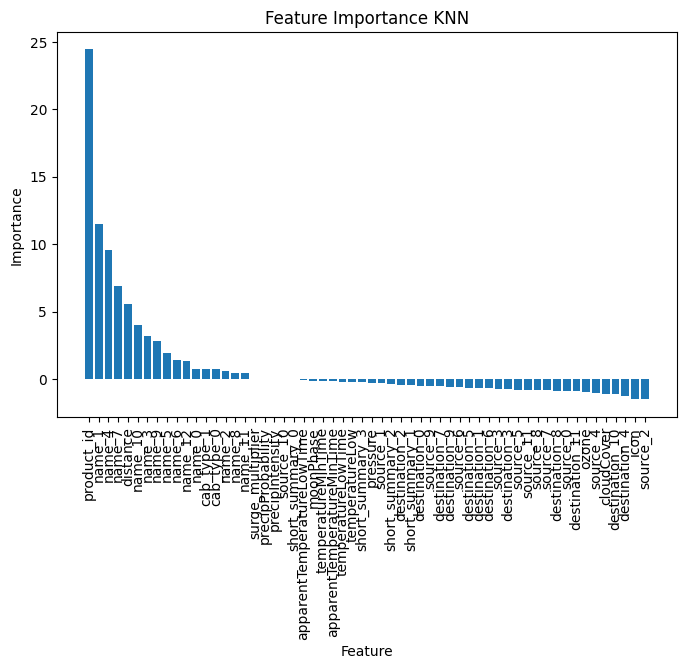

In [26]:
df = pd.DataFrame(importance_knn)

# Bar 차트 그리기
plt.figure(figsize=(8, 5))
plt.bar(df['Feature'], df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance KNN')
plt.xticks(rotation=90)
plt.show()

In [27]:
## 변수 중요도가 음수 = 예측 성능에 부정적 영향을 의미...

## SVR

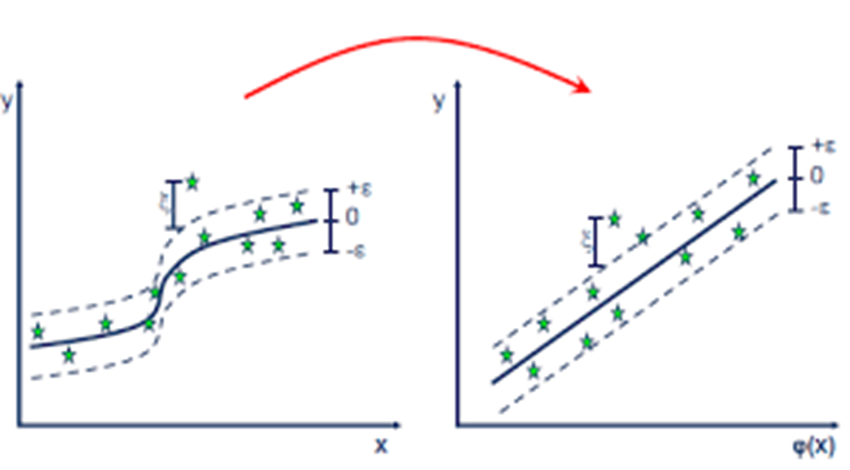

In [28]:
## 서포트 벡터 회귀 (SVM Regressor)
svr_params = {
                    'C': [0.1, 1, 10 ],  # 규제 매개변수 C의 값 탐색
                    'epsilon': [0.1, 0.2, 0.5],  # epsilon-불감대의 폭 설정
                    'kernel': ['rbf'] # 커널 함수선택 (선형, RBF)
                    }
svr_params

{'C': [0.1, 1, 10], 'epsilon': [0.1, 0.2, 0.5], 'kernel': ['rbf']}

In [29]:
from sklearn.svm import SVR

## 마지막에는 최적의 값을 svr에 할당
svr = GridSearchCV(SVR(
                                  # C = 1.0,
                                  # kernel = 'rbf',
                                  # epsilon = 0.1,
                                  # gamma = 'scale', 'auto',
                                  ),
                                         svr_params,
                                         cv = 2, # k-겹 교차검증 사용
                                         scoring='neg_mean_squared_error')


In [30]:
## 최적의 값 찾고 그 값으로 svr 모델링
svr.fit(X = X_train_w_cate,   y = y_train)


y_pred_svr = svr.predict(X_test_w_cate)


y_pred_svr

array([30.72177599, 17.76965274, 19.44951667, 13.02330347, 11.6579005 ,
        8.18208603,  7.43240071,  7.77089994, 36.41352644,  7.14463968,
       17.05597205, 39.61572242, 13.16078029,  8.86059352, 10.57599587,
       29.24042092, 15.32543754, 23.06465618, 36.90525156, 17.13413693,
        7.94333945,  4.83683054,  5.78589041, 31.54957254, 27.6273029 ,
       17.05751417,  7.95849612, 28.99519595, 34.20140214,  7.57816397,
       15.97995771, 11.83946784,  7.86271462,  9.15211136, 14.51889387,
       31.89036178,  7.91317061, 11.78889754, 16.68177097, 16.9297254 ,
       16.61925876, 16.90818629, 28.12646518,  7.31319233, 17.00336162,
       19.82838832, 14.81559596, 14.23692087, 11.71029857, 19.88011494,
       27.50901026, 19.71640052, 26.31511144,  9.39564006, 22.4731722 ,
       12.21937067, 13.72270835, 10.06952195, 10.62636859, 26.40601032,
        7.70241416, 23.83593992, 19.9900104 , 16.20647113, 27.97717918,
       17.51071222, 11.24203718, 12.54924396, 25.21459179, 11.18

In [31]:
from sklearn.inspection import permutation_importance

## 변수 중요도
result = permutation_importance(
                                                                estimator = svr,
                                                                X = X_test_w_cate,
                                                                y = y_test,
                                                                n_repeats  = 3, # n_repeats: 중요도 측정을 위해 특성을 랜덤하게 섞는 반복 횟수
                                                                # random_state=123
                                                     )
importance_svr = pd.DataFrame(
                                                    result.importances_mean,
                                                    index=X_test_w_cate.columns,
                                                    columns=['Importance'])

importance_svr = importance_svr.sort_values(by='Importance', ascending=False)
importance_svr = importance_svr.reset_index()
importance_svr.columns = ['Feature', 'Importance']

importance_svr

,Feature,Importance
0,name_1,29.548101
1,name_4,23.259542
2,distance,18.236394
3,name_7,13.244959
4,name_9,5.882342
5,name_10,5.720249
6,name_3,4.841707
7,name_5,4.217319
8,product_id,4.068845
9,name_12,2.678335


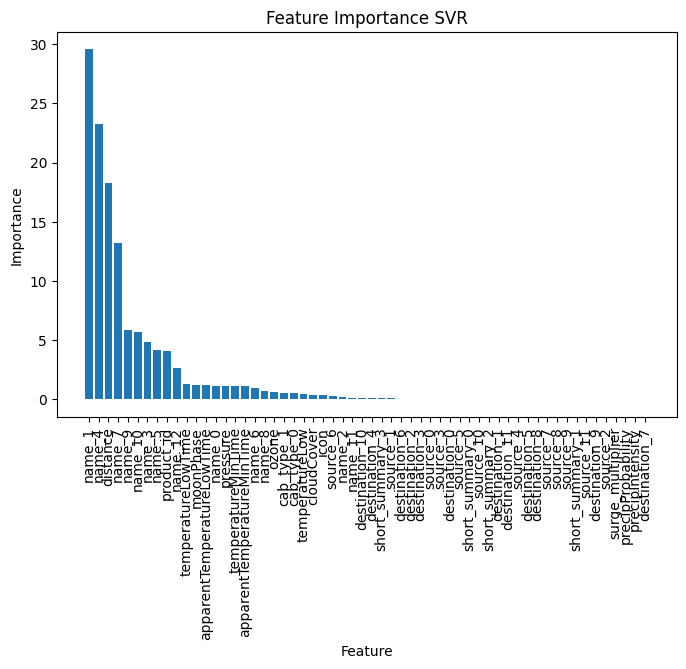

In [32]:
df = pd.DataFrame(importance_svr)

# Bar 차트 그리기
plt.figure(figsize=(8, 5))
plt.bar(df['Feature'], df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance SVR')
plt.xticks(rotation=90)
plt.show()

## DecisionTree

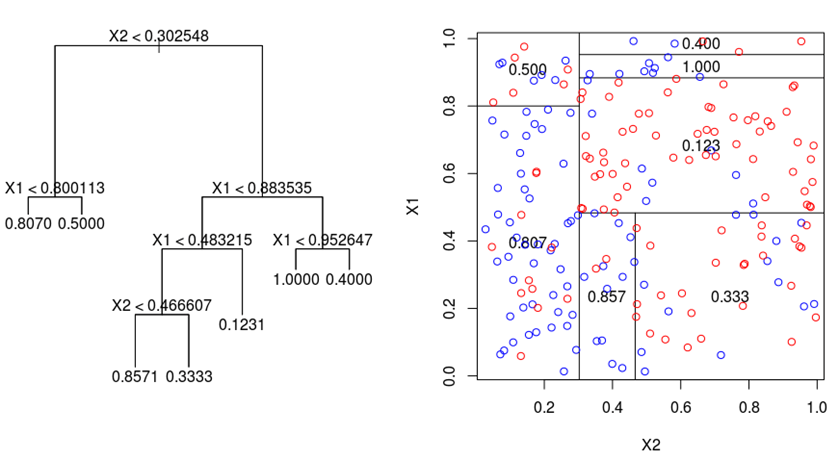

In [33]:
## 결정 트리 회귀 (Decision Tree Regressor)
dt_params = {
                            'max_depth': range(5, 10, 2),  # 트리의 최대 깊이를 1부터 9까지 2간격으로 탐색
                            'min_samples_split': range(5, 10, 2)   # 노드를 분할하기 위한 최소 샘플 수 설정
                            }
dt_params

{'max_depth': range(5, 10, 2), 'min_samples_split': range(5, 10, 2)}

In [34]:
from sklearn.tree import DecisionTreeRegressor

dt = GridSearchCV(DecisionTreeRegressor(
                                                              random_state = 2023
                                                              ),
                                      # refit = True,
                                      dt_params,
                                      cv = 3, # 3-겹 교차검증 사용
                                      scoring = 'neg_mean_squared_error')


In [35]:
dt.fit(X = X_train, ## 기존 변수로 사용!, 일반적으로 전처리가 필요 없음
            y = y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=2023),
             param_grid={'max_depth': range(5, 10, 2),
                         'min_samples_split': range(5, 10, 2)},
             scoring='neg_mean_squared_error')

In [36]:
dt.best_params_

{'max_depth': 7, 'min_samples_split': 9}

In [37]:
y_pred_dt = dt.predict(X_test)  # 테스트 데이터로 예측

y_pred_dt

array([31.18      , 17.64705882, 17.11137441, 11.10227273, 10.6851145 ,
        9.68330134,  7.06040268,  8.07843137, 39.75      ,  7.62616822,
       17.11137441, 45.7       , 13.09090909,  7.96780303, 10.56206897,
       26.91577061, 14.5       , 24.79213483, 39.75      , 16.77      ,
        7.96780303,  4.09756098,  4.09756098, 31.18      , 26.91577061,
       16.77      ,  8.6       , 29.61971831, 35.2       ,  7.96780303,
       15.72569444, 17.16666667,  6.92951542,  8.6       , 15.95652174,
       33.9125    ,  7.96780303, 11.64545455, 16.47727273, 16.77      ,
       16.5       , 17.10714286, 26.91577061,  6.26797386, 16.77      ,
       22.10909091, 16.32352941, 13.09090909, 13.09090909, 19.171875  ,
       26.91577061, 19.84883721, 24.79213483,  9.68330134, 21.77430556,
       11.96      , 13.09090909,  9.68330134,  9.68330134, 26.91577061,
        9.68330134, 21.77430556, 19.171875  , 16.77      , 29.61971831,
       16.77      , 10.93877551, 13.54225352, 26.6920904 , 10.93

In [38]:
importance_dt = pd.DataFrame(dt.best_estimator_.feature_importances_,
                                                                  index=X_train.columns,
                                                                  columns=['Importance'])
importance_dt = importance_dt.sort_values(by='Importance', ascending=False)
importance_dt = importance_dt.reset_index()
importance_dt.columns = ['Feature', 'Importance']
importance_dt

,Feature,Importance
0,name,0.642889
1,product_id,0.211310
2,distance,0.143833
3,source,0.000450
4,temperatureLow,0.000317
5,pressure,0.000267
6,destination,0.000263
7,short_summary,0.000218
8,ozone,0.000157
9,temperatureMinTime,0.000114


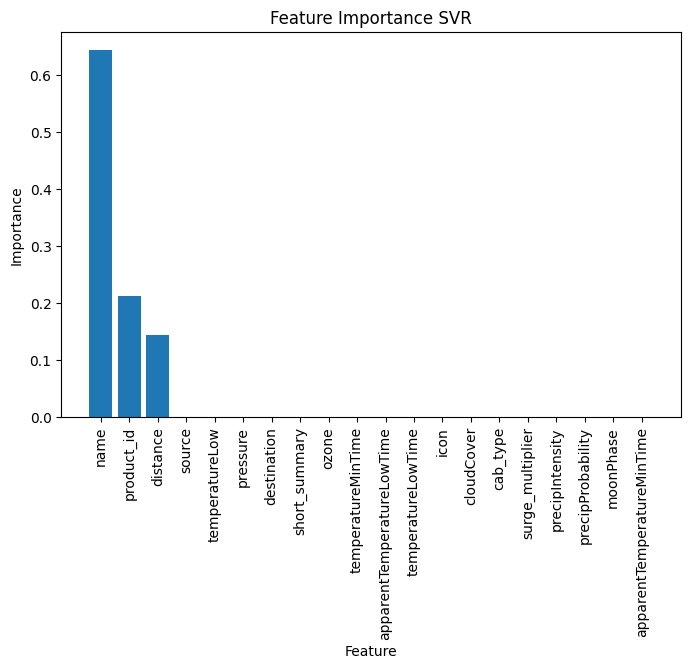

In [39]:
df = pd.DataFrame(importance_dt)

# Bar 차트 그리기
plt.figure(figsize=(8, 5))
plt.bar(df['Feature'], df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance SVR')
plt.xticks(rotation = 90)
plt.show()

# 회귀 모델 결과 비교

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

results = {}
# 성능 평가 함수 정의
def evaluate_performance(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    return {'MSE': mse, 'RMSE': rmse, 'MAPE': mape, 'R2': r2}

# 성능 평가 및 결과 저장
results['KNN'] = evaluate_performance(y_test, y_pred_knn)
results['SVM'] = evaluate_performance(y_test, y_pred_svr)
results['DT'] = evaluate_performance(y_test, y_pred_dt)


In [41]:
results_df = pd.DataFrame(results)
results_df

,KNN,SVM,DT
MSE,21.979766,3.941188,3.781070
RMSE,4.688258,1.985242,1.944497
MAPE,0.277351,0.098500,0.092226
R2,0.729583,0.951512,0.953481


- R^2에 속지 말자
  - R^2 는 변동성을 측정하는 지표이지, 오류 크기를 직접적으로 측정하지 않음
  - R^2 가 1.0이어도 애러는 0 아닐 수 있음

### 참고

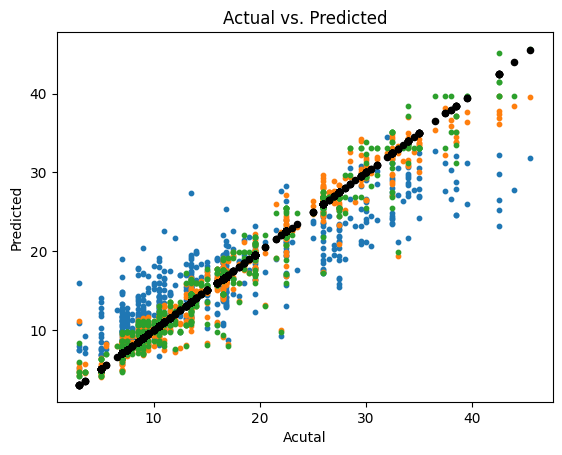

In [42]:
## 참고
plt.scatter(y_test, y_pred_knn, s = 10)
plt.scatter(y_test, y_pred_svr, s = 10)
plt.scatter(y_test, y_pred_dt, s = 10)

plt.scatter(y_test, y_test, s = 20, c = 'k')

plt.title('Actual vs. Predicted')
plt.xlabel('Acutal')
plt.ylabel('Predicted')
plt.show()

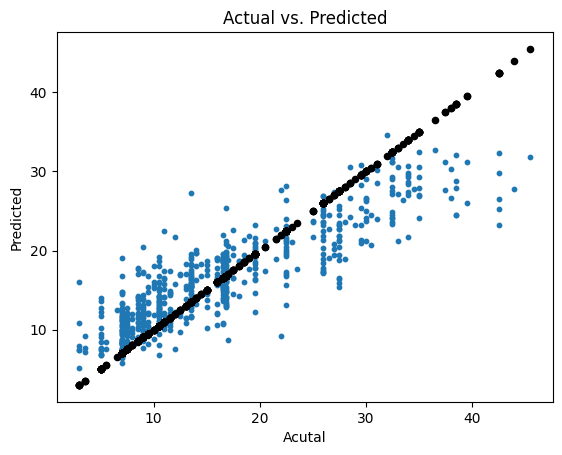

In [43]:
## 참고
plt.scatter(y_test, y_pred_knn, s = 10)
# plt.scatter(y_test, y_pred_svr, s = 10)
# plt.scatter(y_test, y_pred_dt, s = 10)

plt.scatter(y_test, y_test, s = 20, c = 'k')

plt.title('Actual vs. Predicted')
plt.xlabel('Acutal')
plt.ylabel('Predicted')
plt.show()

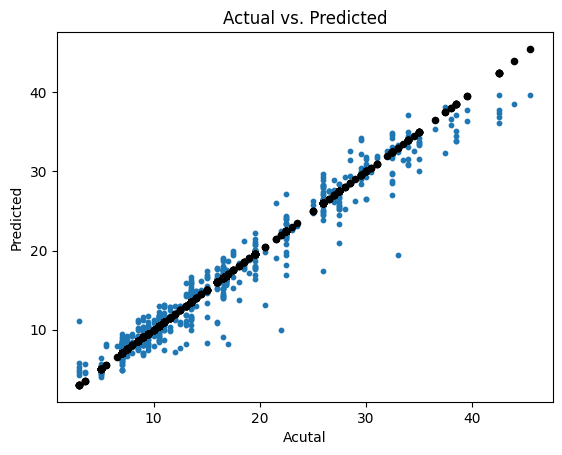

In [44]:
## 참고
# plt.scatter(y_test, y_pred_knn, s = 10)
plt.scatter(y_test, y_pred_svr, s = 10)
# plt.scatter(y_test, y_pred_dt, s = 10)

plt.scatter(y_test, y_test, s = 20, c = 'k')

plt.title('Actual vs. Predicted')
plt.xlabel('Acutal')
plt.ylabel('Predicted')
plt.show()

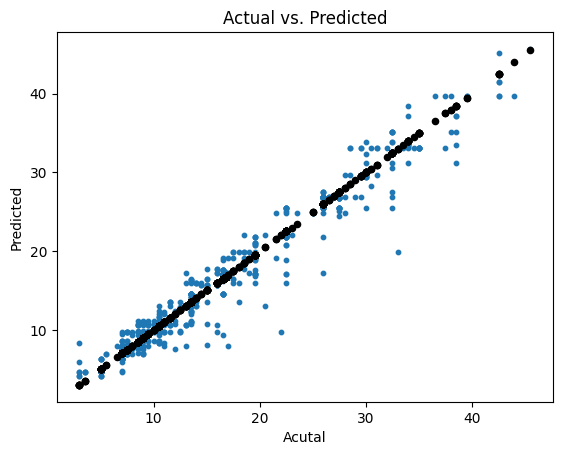

In [45]:
## 참고
# plt.scatter(y_test, y_pred_knn, s = 10)
# plt.scatter(y_test, y_pred_svr, s = 10)
plt.scatter(y_test, y_pred_dt, s = 10)

plt.scatter(y_test, y_test, s = 20, c = 'k')

plt.title('Actual vs. Predicted')
plt.xlabel('Acutal')
plt.ylabel('Predicted')
plt.show()

In [46]:
# EOS